In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sns.set(font_scale=1.4)

In [4]:
teams = {'Atlanta Falcons':'atl','Buffalo Bills':'buf','Carolina Panthers':'car','Chicago Bears':'chi',
         'Cincinnati Bengals':'cin','Cleveland Browns':'cle','Indianapolis Colts':'clt',
         'Arizona Cardinals':'crd','Dallas Cowboys':'dal','Denver Broncos':'den','Detroit Lions':'det',
         'Green Bay Packers':'gnb','Houston Texans':'htx','Jacksonville Jaguars':'jax',
         'Kansas City Chiefs':'kan','Miami Dolphins':'mia','Minnesota Vikings':'min','New Orleans Saints':'nor',
         'New England Patriots':'nwe','New York Giants':'nyg','New York Jets':'nyj','Tennessee Titans':'oti',
         'Philadelphia Eagles':'phi','Pittsburgh Steelers':'pit','Oakland Raiders':'rai',
         'Las Vegas Raiders':'rai','St. Louis Rams':'ram','Los Angeles Rams':'ram','Baltimore Ravens':'rav',
         'San Diego Chargers':'sdg','Los Angeles Chargers':'sdg','Seattle Seahawks':'sea',
         'San Francisco 49ers':'sfo','Tampa Bay Buccaneers':'tam','Washington Redskins':'was'}

In [5]:
path = 'data/df_working.pkl'
with open(path, 'rb') as f:
    dfgame = pickle.load(f)

In [6]:
from sklearn.model_selection import train_test_split

train_ratio = 0.70
validation_ratio = 0.15
test_ratio = 0.15

y = np.ravel(dfgame['Tot_Pts'])
X = dfgame.drop('Tot_Pts',axis=1)
# 70% split for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio, random_state = 77)
# 15%, 15% split for validation, test data
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, 
                                                test_size = test_ratio/(test_ratio + validation_ratio))
X_show = X_train.copy(deep=False)
tp = pd.Series(index=X_train.index,dtype='int64')
for code in tp.index: tp[code] = dfgame.loc[code,'Tot_Pts']
X_show.insert(4,'Tot_Pts',tp)

In [7]:
X_show

,Home_Team,Vis_Team,H_Game,V_Game,Tot_Pts,Over/Under,H_Pts,H_Pts_Opp,V_Pts,V_Pts_Opp,...,H_Puntret,V_Puntret,Temperature,a_turf,astroplay,astroturf,fieldturf,grass,matrixturf,sportturf
Code,,,,,,,,,,,,,,,,,,,,,
201912080buf,Buffalo Bills,Baltimore Ravens,17,24,41,44.0,24.6,13.2,38.4,12.6,...,4.800000,4.600000,43,0,0,1,0,0,0,0
201411020htx,Houston Texans,Philadelphia Eagles,21,31,52,48.5,24.2,23.2,27.8,22.4,...,5.826667,11.550000,70,0,0,0,0,1,0,0
201012120pit,Pittsburgh Steelers,Cincinnati Bengals,23,7,30,39.5,24.0,17.8,21.8,31.8,...,7.719048,1.040000,37,0,0,0,0,1,0,0
201911170ram,Los Angeles Rams,Chicago Bears,17,7,24,40.0,21.8,17.4,19.2,22.4,...,4.333333,12.640000,79,0,0,0,0,1,0,0
201010310det,Detroit Lions,Washington Redskins,37,25,62,45.0,26.4,24.2,18.0,19.2,...,10.600000,12.933333,70,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201710220gnb,Green Bay Packers,New Orleans Saints,17,26,43,45.5,26.0,25.2,29.0,23.2,...,5.200000,3.800000,52,0,0,0,0,1,0,0
201201010cle,Cleveland Browns,Pittsburgh Steelers,9,13,22,33.0,12.8,20.2,18.4,7.8,...,5.433333,7.500000,49,0,0,0,0,1,0,0
201912220cle,Cleveland Browns,Baltimore Ravens,15,31,46,48.5,25.2,21.6,34.4,13.6,...,4.000000,6.400000,49,0,0,0,0,1,0,0


In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

**The barplot demonstrates the quantized nature of football scoring. The significant advantage of the home team is indicated in the scoring as well as in the pie chart.** 

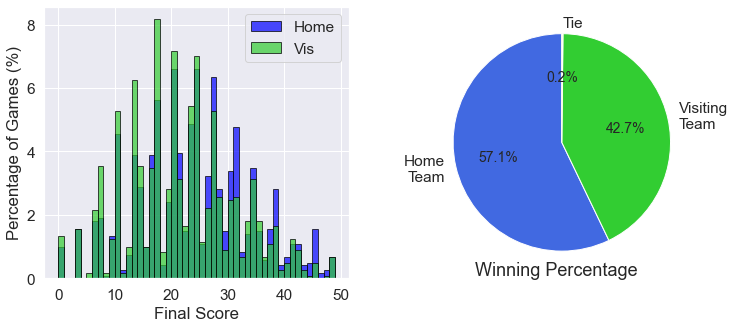

In [9]:
fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5)) 
ax1.set_xlabel('Final Score')
ax1.set_ylabel('Percentage of Games (%)')
weights = np.ones_like(X_show['H_Game']) * 100. / len(X_show['H_Game'])
wbins = np.linspace(0,49,50)
ax1.hist(X_show['H_Game'],wbins,weights=weights,color='blue',ec='black',alpha=0.7,
         label='Home')
ax1.hist(X_show['V_Game'],wbins,weights=weights,color='limegreen',ec='black',alpha=0.7,
         label='Vis')
ax1.legend(loc='upper right')
win = np.array([(X_show['H_Game'] > X_show['V_Game']).sum(),(X_show['H_Game'] < X_show['V_Game']).sum(),
                 (X_show['H_Game'] == X_show['V_Game']).sum()])
labels = 'Home'+'\n'+'Team', 'Visiting'+'\n'+'Team', 'Tie'
colors = ('royalblue','limegreen','yellow')
ax2.pie(win/sum(win),labels=labels,autopct='%1.1f%%',radius=1.0,colors=colors,startangle=90)
ax2.text(0.18,0.01,'Winning Percentage',transform=ax2.transAxes,fontsize=18)
fig1.show()

**We can see the range of total score is much larger than that of the Over/Under (3X) with a positive correlation of 0.28.**

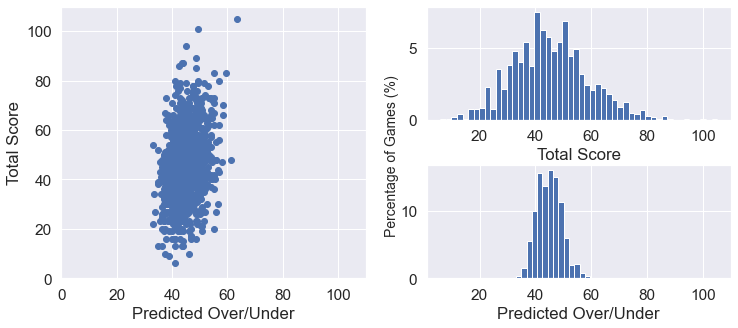

In [10]:
import matplotlib.gridspec as gridspec

fig2 = plt.figure(figsize=(12,5))
outer = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.2)

inner_l = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=outer[0])
ax = plt.Subplot(fig2, inner_l[0])
ax.scatter(X_show['Over/Under'],X_show['Tot_Pts'])
ax.set_xlabel('Predicted Over/Under')
ax.set_ylabel('Total Score')
ax.set_xlim(0,110)
ax.set_ylim(0,110)
fig2.add_subplot(ax)

inner_r = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[1],hspace=0.4)
j=0
ax0 = plt.Subplot(fig2, inner_r[j])
ax0.set_xlabel('Total Score')
weights = np.ones_like(X_show['Tot_Pts']) * 100. / len(X_show['Tot_Pts'])
ax0.hist(X_show['Tot_Pts'],bins=50,weights=weights)
fig2.add_subplot(ax0)
j=1
ax1 = plt.Subplot(fig2, inner_r[j], sharex=ax0)
ax1.hist(X_show['Over/Under'],bins=16,weights=weights)
fig2.add_subplot(ax1)
fig2.text(0.5,0.25,'Percentage of Games (%)',fontsize=14,rotation='vertical')
ax1.set_xlabel('Predicted Over/Under')
fig2.show()

**There is remarkable symmetry in the Over/Under prediction error, as well as in the Over vs. Under wins. This symmetry is also revealed in the median error, although a greater number of outliers to the upside is reflected in the average error.** 

The median and average errors for the Over are 9.0 and 11.0 points
The median and average errors for the Under are -9.0 and -10.4 points


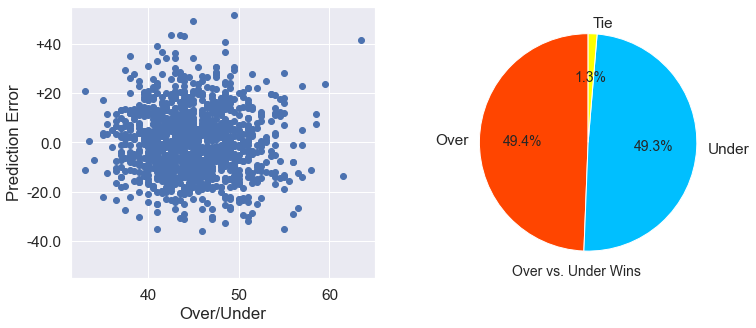

In [11]:
import matplotlib.ticker as tick
fig3, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5)) 
error = X_show['Tot_Pts'] - X_show['Over/Under']
ax1.set_ylim(-55,55)
ax1.set_xlabel('Over/Under')
ax1.set_ylabel('Prediction Error')
ax1.scatter(X_show['Over/Under'],error)
def y_tk_fmt(x,y):
    if x > 0:
        return '{:+d}'.format(int(x))
    else:
        return x
ax1.yaxis.set_major_formatter(tick.FuncFormatter(y_tk_fmt)) 
o_u = np.array([(X_show['Tot_Pts'] > X_show['Over/Under']).sum(),
                (X_show['Tot_Pts'] < X_show['Over/Under']).sum(),
                 (X_show['Tot_Pts'] == X_show['Over/Under']).sum()])
labels = 'Over','Under','Tie'
colors = ('orangered','deepskyblue','yellow')
ax2.pie(o_u/sum(o_u),labels=labels,autopct='%1.1f%%',radius=1.0,colors=colors,
        startangle=90)
ax2.text(0.22,0.01,'Over vs. Under Wins',transform=ax2.transAxes)
fig3.show()
import statistics
pos = error[error > 0]
neg = error[error < 0]
print('The median and average errors for the Over are {0:.1f} and {1:.1f} points'
      .format(pos.median(),pos.mean()))
print('The median and average errors for the Under are {0:.1f} and {1:.1f} points'
      .format(neg.median(),neg.mean()))

In [12]:
import statistics
pos = error[error > 0]
neg = error[error < 0]
print('The median and average errors for the Over are {0:.1f} and {1:.1f} points'
      .format(pos.median(),pos.mean()))
print('The median and average errors for the Under are {0:.1f} and {1:.1f} points'
      .format(neg.median(),neg.mean()))

The median and average errors for the Over are 9.0 and 11.0 points
The median and average errors for the Under are -9.0 and -10.4 points


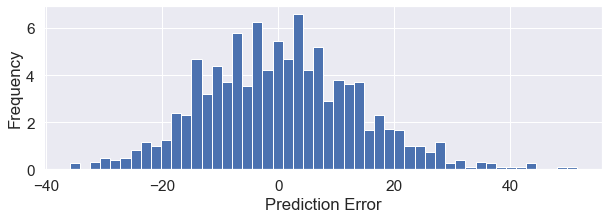

In [13]:
fig4 = plt.figure(figsize=(10,3))
ax = fig4.add_subplot(1,1,1)
ax.set_xlabel('Prediction Error')
ax.set_ylabel('Frequency')
weights = np.ones_like(X_show['Tot_Pts']) * 100. / len(X_show['Tot_Pts'])
ax.hist(error,bins=50,weights=weights)
fig4.show()

**This boxplot shows the symmetry of the error data around 0 and the larger number of positive outliers in the Over/Under prediction error.** 

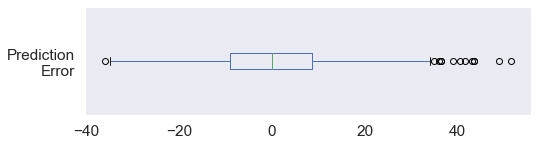

In [14]:
fig5 = plt.figure(figsize=(8,2))
error = pd.Series(error,name='Prediction'+'\n'+'Error')
error.plot.box(grid = False, vert = False)
fig5.show()

In [15]:
# Identify outliers by year
Q3=error.quantile(0.75)
Q1=error.quantile(0.25)
IQR = Q3-Q1
outliers = X_show.loc[error > 1.5*IQR,:]
outlier_year = pd.Series([int(x[0:4]) for x in outliers.index])
year_counts = outlier_year.value_counts().sort_index()

In [16]:
# Calculate percentage of 'Overs' by year 
year = pd.DataFrame([int(x[0:4]) for x in X_show.index],index=X_show.index)
year['Over'] = X_show['Tot_Pts'] > X_show['Over/Under']
over_count = year['Over'].groupby(year.iloc[:,0]).mean()

**There is no particular pattern with respect to number of outlier games and the year from the bar chart. Furthermore, the Over winning percentage is not constant by year, as shown in the line plot. However, there does seem to be some correlation between the Over winning percentage and the number of outlier games.** 

In [17]:
fig6 = plt.figure(figsize=(10,3))
ax = fig5.add_subplot(1,1,1)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Outlier Games')
ax.bar(year_counts.index,year_counts.values,color='green',
       tick_label=[str(i) for i in range(2010,2020)],alpha=0.7)
ax2 = ax.twinx()
ax2.set_ylabel('Over %')
ax2.plot(over_count.index,over_count.values*100,linewidth=1, color='blue')
fig6.tight_layout()  
fig6.show()

<Figure size 720x216 with 0 Axes>

In [18]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

**Examining the upside outlier games further, these games seem to be populated by certain scenarios. Here is a bar plot demonstrating the difference between the mean outlier value and the general mean value as a fraction of the general standard deviation for the categories in our dataset. Games that are poorly predicted to the upside seem to have some of the following characteristics in our dataset:**
 * Home teams having strong pass offenses, particularly those combined with weak visiting pass defenses, as reflected in "H_Pass_Metric" 
 * Home teams with a strong tendency to obtain turnovers
 * Home teams with high red zone percentages against teams with low red zone percentages
 * Visiting teams with penchant for incurring penalties

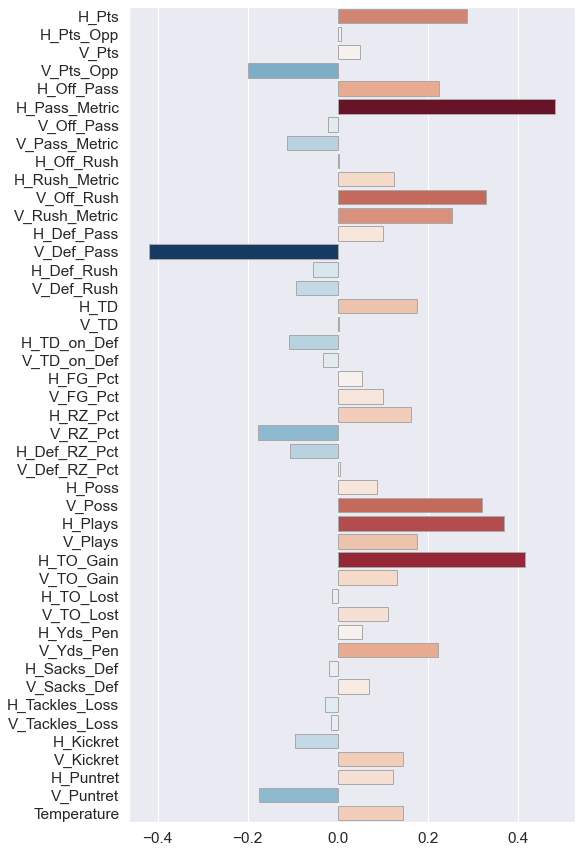

In [19]:
out_desc=outliers.describe()
desc = X_show.describe()
fig7 = plt.figure(figsize=(8,15))
ax = fig6.add_subplot(1,1,1)
ax.set_xlabel('Fraction of std. dev.')
ax.set_ylabel('Category')
category = list(X_show.columns[6:51])
dev = ((out_desc.loc['mean',category]-desc.loc['mean',category])/
       desc.loc['std',category])
sns.barplot(x=dev,y=category,edgecolor='darkgray',palette=colors_from_values(dev,'RdBu_r'))
fig7.show()

**The following correlation matrix reveals that there seems to be a much greater correlation between the scoring history of the teams and the predicted over/under (0.45,0.46) than between the scoring history and the actual total score of the predicted game (0.14,0.13). In addition, there is little to no correlation between the opposing teams' scores of the last five games and the total score of the game in question (0.00,0.05). Also revealed is that there is significant correlation between red zone percentage and scoring history, as expected, but little correlation with scoring history and field goal percentage. The importance of red zone percentage is reflected in the over/under prediction, but less so in the actual total score.**

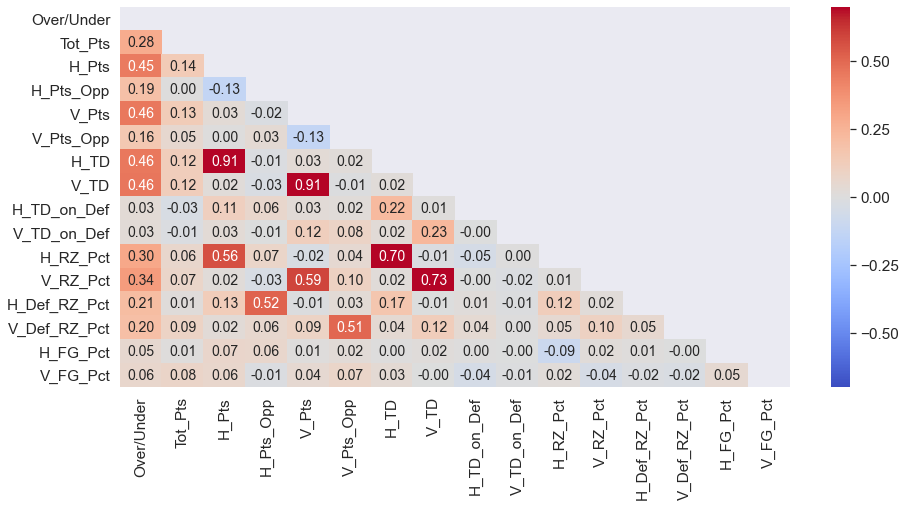

In [20]:
fig8a = plt.figure(figsize=(15,7))
ax = fig8a.add_subplot(1,1,1)
Points=X_show[['Over/Under','Tot_Pts','H_Pts','H_Pts_Opp','V_Pts','V_Pts_Opp','H_TD',
               'V_TD','H_TD_on_Def','V_TD_on_Def','H_RZ_Pct','V_RZ_Pct',
               'H_Def_RZ_Pct','V_Def_RZ_Pct','H_FG_Pct','V_FG_Pct']]
mask = np.triu(Points.corr())
sns.heatmap(Points.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8a.show()

In [ ]:
fig8b = plt.figure(figsize=(15,10))
ax = fig8b.add_subplot(1,1,1)
Ostats=X_show[['Over/Under','Tot_Pts','H_Off_Pass','H_Pass_Metric','V_Off_Pass',
              'V_Pass_Metric','H_Off_Rush','H_Rush_Metric','V_Off_Rush',
              'V_Rush_Metric','H_TO_Lost','V_TO_Lost','H_Yds_Pen','V_Yds_Pen',
              'H_Poss','V_Poss','H_Plays','V_Plays']]
mask = np.triu(Ostats.corr())
sns.set(font_scale=1.4)
sns.heatmap(Ostats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8b.show()

In [ ]:
fig8c = plt.figure(figsize=(15,8))
ax = fig8c.add_subplot(1,1,1)
Dstats=X_show[['Over/Under','Tot_Pts','H_Pts_Opp','V_Pts_Opp','H_Def_Pass','V_Def_Pass',
               'H_Def_Rush','V_Def_Rush','H_Pass_Metric','V_Pass_Metric','H_TO_Gain',
              'V_TO_Gain','H_Sacks_Def','V_Sacks_Def','H_Tackles_Loss','V_Tackles_Loss']]
mask = np.triu(Dstats.corr())
sns.set(font_scale=1.4)
sns.heatmap(Dstats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8c.show()

In [ ]:
fig8d = plt.figure(figsize=(15,5))
Sstats=X_show[['Tot_Pts','Over/Under','H_Kickret','V_Kickret',
              'H_Puntret','V_Puntret']]
mask = np.triu(Sstats.corr())
sns.heatmap(Sstats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f')
fig8d.show()

In [ ]:
fig8e = plt.figure(figsize=(12,8))
Gstats=X_show[['Tot_Pts','Over/Under','H_Pts','H_Pts_Opp','V_Pts','V_Pts_Opp',
             'H_Off_Pass','V_Off_Pass','H_Off_Rush','V_Off_Rush','Temperature',
             'a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']]
mask = np.triu(Gstats.corr())

# masks correlations of surface categories with each other
surfcol=['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']
for col in surfcol:
    ind = Gstats.columns.get_loc(col)
    for i in range(ind+1,len(mask)):
        mask[i,ind] = mask[ind,i]

sns.set(font_scale=1.4)
sns.heatmap(Gstats.corr(),vmin=-0.7,center=0,vmax=0.7,mask=mask,
            annot=True,cmap='coolwarm',fmt='.2f',annot_kws={"size":13})
fig8e.show()

In [ ]:
def weekofgame(game):
    from datetime import timedelta, datetime as dt
    day_of_week={2:0,3:1,4:2,5:3,6:4,0:5,1:6} #day of week starts on Wednesday
    date = dt.strptime(game[0:8],'%Y%m%d')
# .weekday() returns the day of the week for datetime.datetime   
    beg_week = date - timedelta(days=day_of_week[date.weekday()])
    fmt = lambda x: str(x) if x >= 10 else '0'+str(x)
    return(fmt(beg_week.month)+fmt(beg_week.day))

def get_mapping(group):
    d={}
    keys = sorted(group['Week_Beg'].unique())
    values = [i for i in range(6,6+len(keys))]
    for key,value in zip(keys,values):
        d[key] = value
    return d

def get_year(code):
    if (code[4:6] == '01'):
        year = str(int(code[0:4])-1)
    else:
        year = str(int(code[0:4]))
    return year

def combine_dummies(df, name, combine_cols):
    for col in combine_cols:
        ind=df[df[col]==1].index
        df.loc[ind,name] = col
        df.drop(col,axis=1,inplace=True)
    return df

In [ ]:
by_week = X_show[['Tot_Pts','Temperature']]
for ind in by_week.index: 
    by_week.loc[ind,'Week_Beg'] = weekofgame(ind)
    by_week.loc[ind,'Year'] = get_year(ind)
grouped_by_year = by_week.groupby(by_week['Year'])
for key, item in grouped_by_year:
    mapping = get_mapping(item)
    for code in item.index:
        by_week.loc[code,'Week'] = int(mapping[by_week.loc[code,'Week_Beg']])
by_week['Week'] = by_week['Week'].astype('int')

In [ ]:
avg_pts_week = by_week['Tot_Pts'].groupby(by_week['Week']).mean()
avg_temp_week = by_week['Temperature'].groupby(by_week['Week']).mean()

In [ ]:
fig9 = plt.figure(figsize=(10,3))
ax = fig9.add_subplot(1,1,1)
ax.set_xlabel('Week')
ax.set_ylabel('Average Total Points')
ax.set_ylim(41,49)
ax.bar(avg_pts_week.index,avg_pts_week.values,color='green',
       tick_label=[str(i) for i in range(6,18)],alpha=1.0)
ax2 = ax.twinx()
ax2.set_ylabel('Temperature (°F)')
ax2.set_ylim(50,70)
ax2.plot(avg_temp_week.index,avg_temp_week.values,linewidth=1, color='blue')
fig9.tight_layout()  
fig9.show()

In [ ]:
surf_cols=['a_turf','astroplay','astroturf','fieldturf','grass','matrixturf','sportturf']
surface = pd.concat([X_show[['Tot_Pts']],X_show[surf_cols]],axis=1)
by_surface = combine_dummies(surface,'surface',surf_cols)
avg_pts_surf=by_surface['Tot_Pts'].groupby(by_surface['surface']).mean()

In [ ]:
fig10 = plt.figure(figsize=(10,3))
ax = fig10.add_subplot(1,1,1)
ax.set_xlabel('Surface')
ax.set_ylabel('Average Total Points')
ax.set_ylim(40,50)
ax.bar(avg_pts_surf.index,avg_pts_surf.values,color='blue',alpha=0.7)
fig10.show()

In [ ]:
from scipy.stats import pearsonr

In [ ]:
fig11, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Rushing Yards')
ax1.set_ylabel('Home Points')
ax1.set_xlim(0,300)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Off_Rush'], X_show['H_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Off_Rush'],X_show['H_Game'])
ax2.set_xlabel('Visiting Rushing Yards')
ax2.set_ylabel('Visiting Points')
ax2.set_xlim(0,300)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Off_Rush'], X_show['V_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Off_Rush'],X_show['V_Game'])
fig11.show()

In [ ]:
fig12, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Passing Yards')
ax1.set_ylabel('Home Points')
ax1.set_xlim(100,400)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Off_Pass'], X_show['H_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Off_Pass'],X_show['H_Game'])
ax2.set_xlabel('Visiting Passing Yards')
ax2.set_ylabel('Visiting Points')
ax2.set_xlim(100,400)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Off_Pass'], X_show['V_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Off_Pass'],X_show['V_Game'])
fig12.show()

In [ ]:
fig13, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Defensive Rushing Yards')
ax1.set_ylabel('Opponent Points')
ax1.set_xlim(0,300)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Def_Rush'], X_show['V_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Def_Rush'],X_show['V_Game'])
ax2.set_xlabel('Visiting Defensive Rushing Yards')
ax2.set_ylabel('Opponent Points')
ax2.set_xlim(0,300)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Def_Rush'], X_show['H_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Def_Rush'],X_show['H_Game'])
fig13.show()

In [ ]:
fig14, (ax1,ax2) = plt.subplots(1,2,figsize=(10,3)) 
ax1.set_xlabel('Home Defensive Passing Yards')
ax1.set_ylabel('Opponent Points')
ax1.set_xlim(100,400)
ax1.set_ylim(-5,65)
corr, _=pearsonr(X_show['H_Def_Pass'], X_show['V_Game'])
ax1.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax1.scatter(X_show['H_Def_Pass'],X_show['V_Game'])
ax2.set_xlabel('Visiting Defensive Passing Yards')
ax2.set_ylabel('Opponent Points')
ax2.set_xlim(100,400)
ax2.set_ylim(-5,65)
corr, _=pearsonr(X_show['V_Def_Pass'], X_show['H_Game'])
ax2.set_title('Correlation coefficient is {0:.2f}'.format(corr))
ax2.scatter(X_show['V_Def_Pass'],X_show['H_Game'])
fig14.show()